### About Dataset
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [168]:
# Data Analysis and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Model for scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [114]:
# load dataset
df = pd.read_csv('../../dataset/Travel.csv');

In [115]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Data Cleaning

1. Handling Missing Value
2. Handling Duplicate Value
3. Handling Datatype
4. Check Imbalance
5. Understand Dataset

In [116]:
# check all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [117]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [118]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [119]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [120]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [121]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [122]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [123]:
# check missing value
missing_values = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in missing_values:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), "% missing value")

Age 4.62357 % missing value
TypeofContact 0.51146 % missing value
DurationOfPitch 5.13502 % missing value
NumberOfFollowups 0.92062 % missing value
PreferredPropertyStar 0.53191 % missing value
NumberOfTrips 2.86416 % missing value
NumberOfChildrenVisiting 1.35025 % missing value
MonthlyIncome 4.76678 % missing value


In [124]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [126]:
df['MonthlyIncome'].median()

22347.0

In [127]:
# fill all missing value
df['Age'] = df.Age.fillna(df.Age.median())
df['TypeofContact'] = df.TypeofContact.fillna(df['TypeofContact'].mode()[0])
df['DurationOfPitch'] = df.DurationOfPitch.fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups'] = df.NumberOfFollowups.fillna(df['NumberOfFollowups'].median())
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median())
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [128]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [130]:
df['TypeofContact'].dtypes

dtype('O')

In [131]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_feature

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [132]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [133]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [134]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [135]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [136]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [137]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [138]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [139]:
# first drop the Customer id
df.drop(columns=['CustomerID'], axis=1, inplace=True)

### Feature Engineering
#### Feature Extraction

In [140]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [141]:
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [142]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [143]:
# create x and y
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [144]:
# split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape, X_test.shape

((3910, 17), (978, 17))

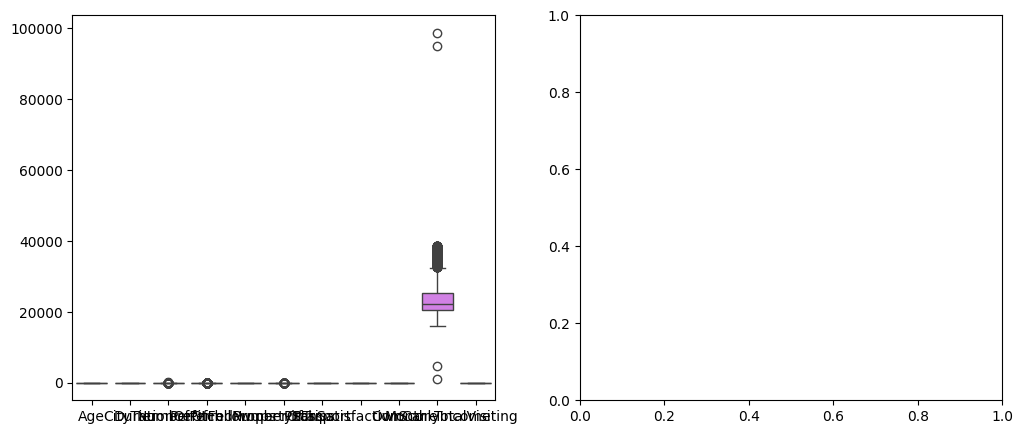

In [146]:
# after StandardScaler 
plt.subplots( nrows=1, ncols=2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.show();

In [147]:
# turn into categorical feature into numerical feature
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
one_hot = OneHotEncoder(drop="first")


processor = ColumnTransformer([
    ('OneHotEncoder', one_hot, cat_features),
    ('StandardScaler', scaler, num_features)
])

In [148]:
X_train = processor.fit_transform(X_train)

In [149]:
X_test = processor.transform(X_test)

In [174]:
# model dict
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "loggistic Regression ": LogisticRegression()
}

def model_and_score(models, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)

    # make a dict to keep model score
    model_score = {}
    for name, model in models.items():
        # fit model
        model.fit(X_train, y_train)
        # evaluate model and store score
        model_score[name]= model.score(X_test, y_test)

        # predict 
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training Set Performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        model_train_precision = precision_score(y_train, y_train_pred)
        model_train_recall = recall_score(y_train, y_train_pred)
        model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)
    
        # Test Set Performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        model_test_precision = precision_score(y_test, y_test_pred)
        model_test_recall = recall_score(y_test, y_test_pred)
        model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

        print(f'{name} Model Performance for Training set')
        print('- Accuracy:  {:.4f}'.format(model_train_accuracy))
        print('- F1 Score:  {:.4f}'.format(model_train_f1))
        print('- Precision:  {:.4f}'.format(model_train_precision))
        print('- Recall:  {:.4f}'.format(model_train_recall))
        print('- ROC_AUC:  {:.4f}'.format(model_train_roc_auc_score))
    
        print("-"*50)
        
        print(f'{name} Model Performance for Testing set')
        print('- Accuracy:  {:.4f}'.format(model_test_accuracy))
        print('- F1 Score:  {:.4f}'.format(model_test_f1))
        print('- Precision:  {:.4f}'.format(model_test_precision))
        print('- Recall:  {:.4f}'.format(model_test_recall))
        print('- ROC_AUC:  {:.4f}'.format(model_test_roc_auc_score))
    
        print("="*50)
        print('\n')

    return model_score
    

In [175]:
model_acc = model_and_score(models, X_train, X_test, y_train, y_test)

Random Forest Model Performance for Training set
- Accuracy:  1.0000
- F1 Score:  1.0000
- Precision:  1.0000
- Recall:  1.0000
- ROC_AUC:  1.0000
--------------------------------------------------
Random Forest Model Performance for Testing set
- Accuracy:  0.9264
- F1 Score:  0.9204
- Precision:  0.9685
- Recall:  0.6440
- ROC_AUC:  0.8194


Decision Tree Model Performance for Training set
- Accuracy:  1.0000
- F1 Score:  1.0000
- Precision:  1.0000
- Recall:  1.0000
- ROC_AUC:  1.0000
--------------------------------------------------
Decision Tree Model Performance for Testing set
- Accuracy:  0.9131
- F1 Score:  0.9125
- Precision:  0.7880
- Recall:  0.7592
- ROC_AUC:  0.8548


AdaBoost Model Performance for Training set
- Accuracy:  0.8478
- F1 Score:  0.8146
- Precision:  0.7815
- Recall:  0.2551
- ROC_AUC:  0.6194
--------------------------------------------------
AdaBoost Model Performance for Testing set
- Accuracy:  0.8354
- F1 Score:  0.7987
- Precision:  0.7500
- Recall:  

In [176]:
model_acc

{'Random Forest': 0.9263803680981595,
 'Decision Tree': 0.9130879345603272,
 'AdaBoost': 0.8353783231083844,
 'loggistic Regression ': 0.83640081799591}

In [177]:
compare_model = pd.DataFrame(model_acc, index=["Accuracy"])

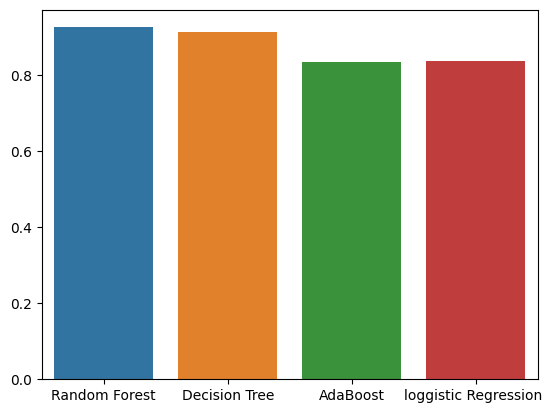

In [178]:
sns.barplot(data=compare_model);

#### Hyperparameter Tuning

In [181]:
# Set different hyperparameter for RandomForestClassification
random_forest_para_grid = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}


In [183]:
random_cv_models = [
    ('RF', RandomForestClassifier(), random_forest_para_grid)
]

In [184]:
random_cv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
          750, 800, 850, 900, 950]),
   'max_depth': [10, 20, 30, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['sqrt', 'log2', None]})]

In [189]:
model_params = {}
for name, model, param in random_cv_models:
    random = RandomizedSearchCV(
                                estimator=model,
                                param_distributions=param,
                                n_iter=10,
                                cv=5,
                                verbose=2,
                                n_jobs=-1
                            ) 
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_


for model_name in model_params:
    print(f"--------Best params for {model_name}------")
    print(model_params[model_name])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
--------Best params for RF------
{'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}


In [191]:
random.score(X_test, y_test)

0.9222903885480572

In [196]:
# model dict
models = {
    "Random Forest": RandomForestClassifier(n_estimators=450, 
                                            min_samples_split=2, 
                                            min_samples_leaf=2,
                                           max_features=None,
                                           max_depth=30)
}

def model_and_score(models, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)

    # make a dict to keep model score
    model_score = {}
    for name, model in models.items():
        # fit model
        model.fit(X_train, y_train)
        # evaluate model and store score
        model_score[name]= model.score(X_test, y_test)

        # predict 
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training Set Performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        model_train_precision = precision_score(y_train, y_train_pred)
        model_train_recall = recall_score(y_train, y_train_pred)
        model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)
    
        # Test Set Performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        model_test_precision = precision_score(y_test, y_test_pred)
        model_test_recall = recall_score(y_test, y_test_pred)
        model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

        print(f'{name} Model Performance for Training set')
        print('- Accuracy:  {:.4f}'.format(model_train_accuracy))
        print('- F1 Score:  {:.4f}'.format(model_train_f1))
        print('- Precision:  {:.4f}'.format(model_train_precision))
        print('- Recall:  {:.4f}'.format(model_train_recall))
        print('- ROC_AUC:  {:.4f}'.format(model_train_roc_auc_score))
    
        print("-"*50)
        
        print(f'{name} Model Performance for Testing set')
        print('- Accuracy:  {:.4f}'.format(model_test_accuracy))
        print('- F1 Score:  {:.4f}'.format(model_test_f1))
        print('- Precision:  {:.4f}'.format(model_test_precision))
        print('- Recall:  {:.4f}'.format(model_test_recall))
        print('- ROC_AUC:  {:.4f}'.format(model_test_roc_auc_score))
    
        print("="*50)
        print('\n')

    return model_score
    

In [197]:
model_and_score(models, X_train, X_test, y_train, y_test)

Random Forest Model Performance for Training set
- Accuracy:  0.9944
- F1 Score:  0.9943
- Precision:  0.9972
- Recall:  0.9726
- ROC_AUC:  0.9860
--------------------------------------------------
Random Forest Model Performance for Testing set
- Accuracy:  0.9264
- F1 Score:  0.9213
- Precision:  0.9407
- Recall:  0.6649
- ROC_AUC:  0.8274




{'Random Forest': 0.9263803680981595}

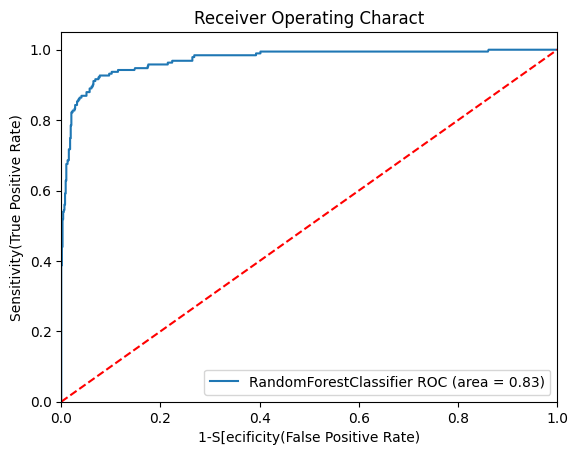

In [199]:
from sklearn.metrics import roc_curve
plt.figure()

auc_models = [
    {
        'label': 'RandomForestClassifier',
        'model':  RandomForestClassifier(n_estimators=450, 
                                            min_samples_split=2, 
                                            min_samples_leaf=2,
                                           max_features=None,
                                           max_depth=30),
        'auc': 0.8274
        
    } 
]

#Create a loop thugh all models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    #Comute the fpr, tpr 
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #Calculate Area under THe Curve
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))


#Custom Settings for the plot
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-S[ecificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Charact')
plt.legend(loc='lower right')
plt.savefig("auc.png")
plt.show()